# OSEMN Exercises

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import struct, time
import json
import csv
import urllib.request

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [19]:
a = np.random.rand(10)
print (a)
file1 = open(r"/Users/Sebastiano/data/simple_data.txt","w")
for i in range(0, len(a)):
    file1.write(str(a[i]) + '\n')
file1.close()

[0.7571641  0.11663676 0.21503456 0.29610796 0.01065232 0.06317556
 0.66400954 0.64065646 0.40390833 0.61629442]


2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [34]:
a = np.random.rand(7, 5)
print (a)
file2 = open(r"/Users/Sebastiano/data/data.txt","w")
for i in range(0, len(a)):
    for j in range(0, len(a[i])):
        if j != len(a[i]) -1:
            file2.write(str(a[i][j]) + " ")
        else:
            file2.write(str(a[i][j]))
    file2.write('\n')
file2.close()

[[0.75074191 0.02799188 0.92022128 0.9858595  0.23829853]
 [0.46818744 0.20420285 0.44619748 0.48526    0.91264136]
 [0.80057098 0.90681274 0.83152132 0.14421042 0.73430145]
 [0.80906314 0.89244468 0.59949447 0.28088285 0.76446575]
 [0.6715045  0.14960927 0.86306185 0.93336434 0.12275176]
 [0.87787392 0.49011799 0.69723074 0.39736432 0.30369193]
 [0.69815803 0.86225999 0.59790763 0.83098964 0.52083623]]


3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [36]:
file_name = "/Users/Sebastiano/data/data.txt"
file3 = open(r"/Users/Sebastiano/data/data.csv","w")
with open(file_name, mode='r') as f:
    for line in f:
        oldstr = line
        newstr = oldstr.replace(" ", ",")
        file3.write(newstr)
file3.close()

4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [14]:
with  open('/Users/Sebastiano/LaboratoryOfComputationalPhysics_Y3/credit_card.dat','rb') as file:
    file_content = file.read()
    #print(file_content)
    word_counter = 0
    character_size = 6 #size of a character in bits (even the space)
    word_size = 120 #size of the word in bits
    for i in range(0, len(file_content), word_size):
        word_counter += 1
        code = ""
        for j in range(0, word_size-character_size, character_size):
            if j < 114 and j != 24 and j != 54 and j != 84:
                k = i+j+2
                #print(file_content[k:k+4])
                #n = int(file_content[k:k+4], 2)
                #print(n)
                s = str(int(file_content[k:k+4], 2))
                #print(s)
            if j == 24 or j == 54 or j == 84:
                s = '-'
                #print(s)
            code += s
        print(word_counter, "Credit card number:", code)

1 Credit card number: 7648-5673-3775-2271
2 Credit card number: 3257-8247-3354-2266
3 Credit card number: 2722-0001-4011-6652
4 Credit card number: 0661-3063-3742-3150
5 Credit card number: 0432-1608-1462-4742
6 Credit card number: 5827-2027-8785-7303
7 Credit card number: 5774-8528-2087-1117
8 Credit card number: 8140-1210-6352-2845
9 Credit card number: 5764-1133-7301-7100
10 Credit card number: 6456-1737-4126-6726
11 Credit card number: 1228-8631-7382-0000
12 Credit card number: 7051-0160-5374-3166
13 Credit card number: 0618-3587-1630-6376
14 Credit card number: 1545-5454-7444-5636
15 Credit card number: 6735-3116-3202-6834
16 Credit card number: 7287-5011-1547-8413
17 Credit card number: 7033-2607-3328-4200
18 Credit card number: 2568-5244-1874-5024
19 Credit card number: 1684-2253-7570-7118
20 Credit card number: 0672-2576-0575-6631
21 Credit card number: 6332-8353-8787-1340
22 Credit card number: 1813-3361-1175-4211
23 Credit card number: 2477-6450-8840-2368
24 Credit card numbe

ValueError: invalid literal for int() with base 2: b''

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [45]:
data = json.load(open('/Users/Sebastiano/LaboratoryOfComputationalPhysics_Y3/user_data.json'))
#print (data)
file = open(r"/Users/Sebastiano/data/user_data.csv","w")
s = ","
for l in data:
    if l["CreditCardType"] == "American Express":
        #print(l)
        info = l["ID"] + s + l["JobTitle"] + s + l["EmailAddress"] + s + l["FirstNameLastName"] + s + l["CreditCard"] + s + l["CreditCardType"]
        file.write(info)
    file.write("\n")
file.close()

6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe wath yuou see


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

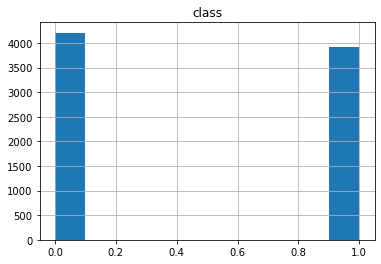

In [48]:
url ='https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1'
with urllib.request.urlopen(url) as data_file:
    mshrms = pd.read_csv(data_file)
    #print(mshrms)
    mshrms.info()

    mshrms.hist("class")
    print("\nFrom the histogram i can see that for the 'class' field there are two possible values: 0 or 1. Almost half of the entries comes from 'class' = 1 and the others belong to 'class' = 0.")

7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

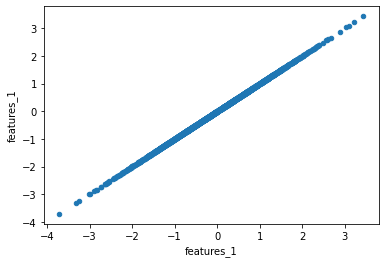

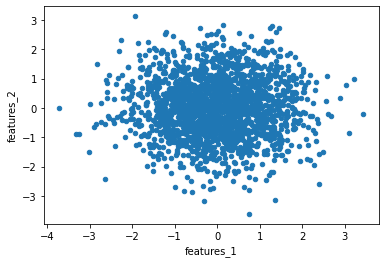

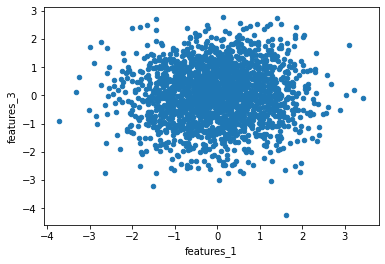

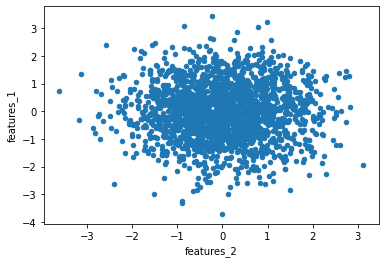

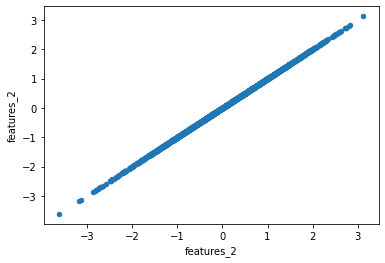

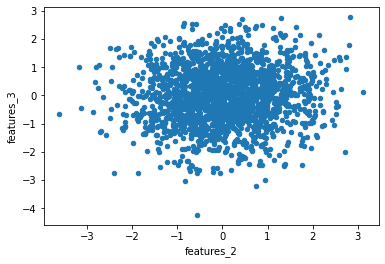

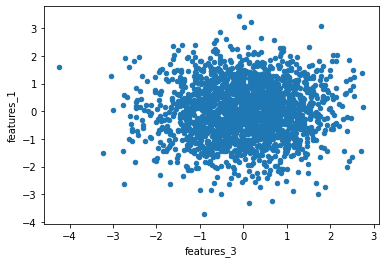

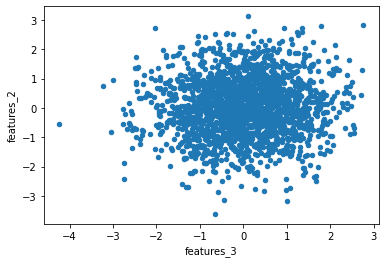

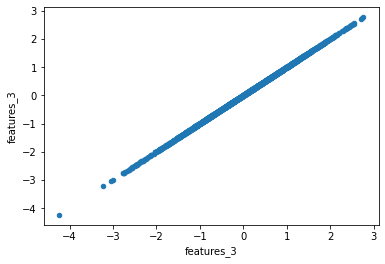

In [10]:
url ='https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1'
with urllib.request.urlopen(url) as data_file:
    reg = pd.read_csv(data_file)
    name = "features_"
    for i in range(1, 4):
        for j in range(1, 4):
            n1 = str(i)
            n2 = str(j)
            reg.plot.scatter(name+n1, name+n2)

8\. Load the same file of point 6, and convert the file to json with Pandas.

In [43]:
url ='https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1'

f = open(r"/Users/Sebastiano/data/mushrooms_categorized.json","w")
f.write("[\n")

with urllib.request.urlopen(url) as data_f:
    mshrms = pd.read_csv(data_f)
    #print(mshrms.columns)
    for i in range(0, 8123):
        f.write("{\n")
        for col in mshrms.columns:
            if col != "habitat":
                f.write('"' + str(col) + '":"' + str(mshrms.loc[mshrms.index[i], col]) + '",\n')
            elif col == "habitat":
                f.write('"' + str(col) + '":"' + str(mshrms.loc[mshrms.index[i], col]) + '"\n')
        if i != 8122:
            f.write("},\n")
        elif i == 8122:
            f.write("}\n")

f.write("]")
f.close()